# *Twitter Sentiment Analysis using Twitter API*

### Project Outline:
1. Importing the Libraries
2. Authentication
3. Connecting with Twitter API and extracting the data
4. Creating a DataFrame of all the Tweets
5. Cleaning the Dataset
6. Analyzing the Data with TextBlob

### Step-1 : Installing the Libraries

In [1]:
import tweepy
from textblob import TextBlob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
from wordcloud import WordCloud, STOPWORDS


### Step-2: Authentication

In [2]:
# Twitter Api Credentials
#Set Connecion
#Get from developers.twitter.com/App->Setting->keys&tokens

consumerKey = 'bg1cggERbv8fAsiuRIgtRboi4'
consumerSecretKey = 'TLRSGZL0kA2eI90WTeHALXHMps7dM1HhSfqfpZhA7h3zOWadgb'
accessToken = '1504802750408048644-3GInw7mDst6YZ3QKv8om40fFZxXvAo'
accessTokenSecret = '9unNUBwLIE3KOAVOq4rx0yPiUMMjbJm5qVCBFlMxYdEEf'


Note: **Tweepy** is a popular package in Python for interacting with the Twitter API. Recently, the version 4.0 of this package was released that supports the Twitter API v2.

In [3]:
# Authentication object creation
api = tweepy.Client(consumer_key= consumerKey,consumer_secret= consumerSecretKey,access_token= accessToken,access_token_secret= accessTokenSecret,bearer_token='AAAAAAAAAAAAAAAAAAAAAAFibQEAAAAAbFA0e1usx8DQDGYooccqszo5ihI%3DOaDClCxv7UA8Wkr4zNSj7NwEeStUpGiOqORGZd7mLPbTLECOaq')

### Step-3: Getting the Tweets

In [4]:
keyword = input("Enter the hashtag to search: ")
count = int(input("Enter the number of tweets to be analyzed: "))

Enter the hashtag to search: metoo
Enter the number of tweets to be analyzed: 789


In [106]:

posts = [tweet.text for tweet in tweepy.Paginator(api.search_recent_tweets, query='{} lang:en'.format(keyword),
                              tweet_fields=['context_annotations', 'created_at'], max_results=100).flatten(limit=count) ]

In [107]:
posts

['RT @bsratbsrat6: "I don\'t feel safe in Tigray anymore. Even the sight of the military uniform frightens me very much," a survivor, told AFP…',
 'RT @itsan0ctopus: @CalebCityBiker Examples pulled from the prompt: advertisement, news, PSA, campaigns, speech, #metoo; #BlackLivesmatter;…',
 'RT @apriljonesbs: Whoever wrote this needs to be sacked. So much info wrong or missing, and ‘says’ i was groped? I thought after #metoo it…',
 "RT @DanaLArcuri: Don’t compare your trauma to another person's trauma. Comparison is a thief. Abuse is still abuse.  Trauma is horrible and…",
 '@SkyCatch_Her @QueenOfWhuts @KjmudkipzD @lawless08 Fair enough. However, I find it more than suspicious that with Will action happened immed, when it took #metoo and even still Casey Affleck and Woody Allen are still embraced\n\nWill will be shadowbanned while other WHITE performers are just put on time out for far worse',
 'RT @bsratbsrat6: "I don\'t feel safe in Tigray anymore. Even the sight of the military unifo

In [108]:
# Getting the tweets
i=1
for post in posts:
    print(str(i) + '. ' + post + '\n')
    i=i+1

1. RT @bsratbsrat6: "I don't feel safe in Tigray anymore. Even the sight of the military uniform frightens me very much," a survivor, told AFP…

2. RT @itsan0ctopus: @CalebCityBiker Examples pulled from the prompt: advertisement, news, PSA, campaigns, speech, #metoo; #BlackLivesmatter;…

3. RT @apriljonesbs: Whoever wrote this needs to be sacked. So much info wrong or missing, and ‘says’ i was groped? I thought after #metoo it…

4. RT @DanaLArcuri: Don’t compare your trauma to another person's trauma. Comparison is a thief. Abuse is still abuse.  Trauma is horrible and…

5. @SkyCatch_Her @QueenOfWhuts @KjmudkipzD @lawless08 Fair enough. However, I find it more than suspicious that with Will action happened immed, when it took #metoo and even still Casey Affleck and Woody Allen are still embraced

Will will be shadowbanned while other WHITE performers are just put on time out for far worse

6. RT @bsratbsrat6: "I don't feel safe in Tigray anymore. Even the sight of the military uniform 

### Step-4: Creating a DataFrame of the Tweets

In [109]:
# Creating a DataFrame of Tweets
tweets_data = pd.DataFrame([post for post in posts], columns=['Tweets'])

In [110]:
tweets_data

,Tweets
0,"RT @bsratbsrat6: ""I don't feel safe in Tigray ..."
1,RT @itsan0ctopus: @CalebCityBiker Examples pul...
2,RT @apriljonesbs: Whoever wrote this needs to ...
3,RT @DanaLArcuri: Don’t compare your trauma to ...
4,@SkyCatch_Her @QueenOfWhuts @KjmudkipzD @lawle...
...,...
784,RT @sarahditum: And also in the ST: I intervie...
785,RT @ST_Culture: Steve Coogan says the feminist...
786,RT @LifeMathMoney: Modern feminism messes up h...
787,Is there a better word for this than grooming?...


### Step-5: Cleaning the Dataset

In [111]:
tweets_data.drop_duplicates(inplace= True)

In [112]:
tweets_data

,Tweets
0,"RT @bsratbsrat6: ""I don't feel safe in Tigray ..."
1,RT @itsan0ctopus: @CalebCityBiker Examples pul...
2,RT @apriljonesbs: Whoever wrote this needs to ...
3,RT @DanaLArcuri: Don’t compare your trauma to ...
4,@SkyCatch_Her @QueenOfWhuts @KjmudkipzD @lawle...
...,...
782,"RT @unprietaso_guay: What an hypocrite tbh, ma..."
783,"What an hypocrite tbh, manipulator and the wor..."
784,RT @sarahditum: And also in the ST: I intervie...
787,Is there a better word for this than grooming?...


In [113]:
# Function to clean the tweets
def cleanText(text):
    text = re.sub('@[A-Za-z0-9]+','', text)
    text = re.sub('#','',text)
    text = re.sub('RT[\s]+','',text)
    text = re.sub('http?:\/\/\S+','',text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(':+','',text)
    return text.lower()

In [114]:
tweets_data['Tweets'] = tweets_data['Tweets'].apply(cleanText)
tweets_data

,Tweets
0,"""i don't feel safe in tigray anymore. even th..."
1,examples pulled from the prompt advertisemen...
2,whoever wrote this needs to be sacked. so muc...
3,don’t compare your trauma to another person's...
4,"_her fair enough. however, i find it more t..."
...,...
782,"_guay what an hypocrite tbh, manipulator and t..."
783,"what an hypocrite tbh, manipulator and the wor..."
784,and also in the st i interviewed steve coogan...
787,is there a better word for this than grooming?...


### Step 6: Sentiment Analysis

Now, I can use cleaned text to calculate polarity, subjectivity, sentiment, negative, positive, neutral and compound parameters again.

In [115]:
def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def get_polarity(text):
    return TextBlob(text).sentiment.polarity

tweets_data['Subjectivity'] = tweets_data['Tweets'].apply(get_subjectivity)
tweets_data['Polarity'] = tweets_data['Tweets'].apply(get_polarity)

In [116]:
tweets_data

,Tweets,Subjectivity,Polarity
0,"""i don't feel safe in tigray anymore. even th...",0.286667,0.220000
1,examples pulled from the prompt advertisemen...,0.000000,0.000000
2,whoever wrote this needs to be sacked. so muc...,0.383333,-0.166667
3,don’t compare your trauma to another person's...,1.000000,-1.000000
4,"_her fair enough. however, i find it more t...",0.496875,0.109375
...,...,...,...
782,"_guay what an hypocrite tbh, manipulator and t...",1.000000,-1.000000
783,"what an hypocrite tbh, manipulator and the wor...",1.000000,-1.000000
784,and also in the st i interviewed steve coogan...,0.500000,0.500000
787,is there a better word for this than grooming?...,0.350000,0.350000


### Step-7: Analysis

In [117]:
def getAnalysis(score):
    if score<0:
        return 'Negative'
    elif score==0:
        return 'Neutral'
    else:
        return 'Positive'

tweets_data['Analysis_Outcome'] = tweets_data['Polarity'].apply(getAnalysis)

In [118]:
tweets_data

,Tweets,Subjectivity,Polarity,Analysis_Outcome
0,"""i don't feel safe in tigray anymore. even th...",0.286667,0.220000,Positive
1,examples pulled from the prompt advertisemen...,0.000000,0.000000,Neutral
2,whoever wrote this needs to be sacked. so muc...,0.383333,-0.166667,Negative
3,don’t compare your trauma to another person's...,1.000000,-1.000000,Negative
4,"_her fair enough. however, i find it more t...",0.496875,0.109375,Positive
...,...,...,...,...
782,"_guay what an hypocrite tbh, manipulator and t...",1.000000,-1.000000,Negative
783,"what an hypocrite tbh, manipulator and the wor...",1.000000,-1.000000,Negative
784,and also in the st i interviewed steve coogan...,0.500000,0.500000,Positive
787,is there a better word for this than grooming?...,0.350000,0.350000,Positive


In [119]:
tweets_data['Analysis_Outcome'].value_counts()

Positive    201
Neutral     125
Negative     75
Name: Analysis_Outcome, dtype: int64

In [120]:
tweets_data.shape

(401, 4)

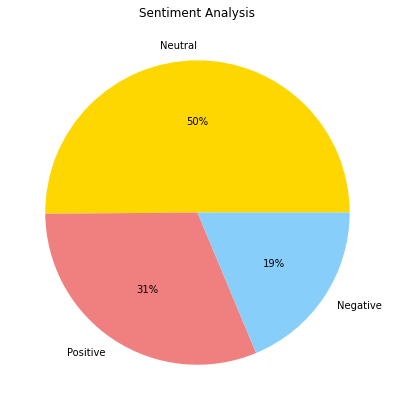

In [121]:
plt.figure(figsize=(10,7))
labels = ['Neutral','Positive','Negative']
colors = ['gold', 'lightcoral', 'lightskyblue']
plt.pie(tweets_data['Analysis_Outcome'].value_counts(), labels=labels, colors=colors, autopct='%.0f%%')
plt.title("Sentiment Analysis")
plt.show()

In [122]:
tweets_list_negative = tweets_data[tweets_data['Analysis_Outcome']=='Negative']
tweets_list_positive = tweets_data[tweets_data['Analysis_Outcome']=='Positive']
tweets_list_neutral = tweets_data[tweets_data['Analysis_Outcome']=='Neutral']


In [123]:
negatives = len(tweets_list_negative)
positives = len(tweets_list_positive)
neutral = len(tweets_list_neutral)

In [134]:
def createWordCloud(text):
    # Word Cloud Visualization
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color='white',
    max_words=3000,
    stopwords=stopwords,
    repeat=True)
    wc.generate(str(text))
    wc.to_file('wc.png')
    plt.imshow(wc, interpolation='bilinear')

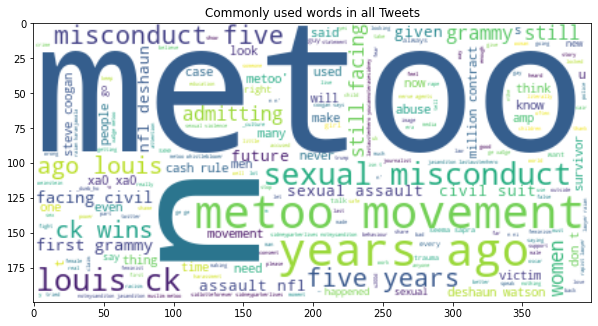

In [140]:
plt.figure(figsize=(10,8))
plt.title('Commonly used words in all Tweets')
createWordCloud(tweets_data['Tweets'].values)

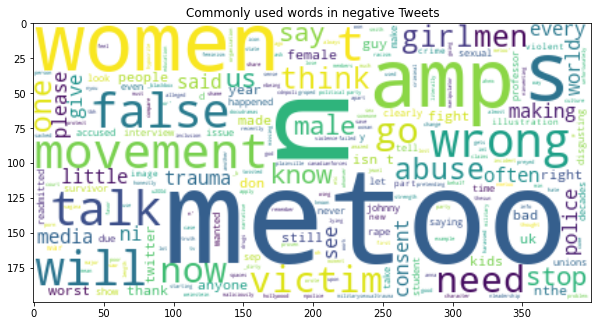

In [141]:
plt.figure(figsize=(10,8))
plt.title('Commonly used words in negative Tweets')
createWordCloud(tweets_list_negative['Tweets'].values)

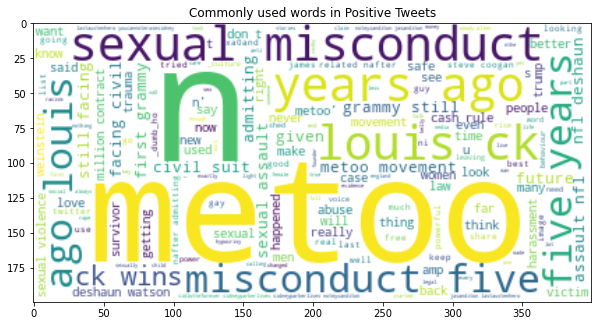

In [142]:
plt.figure(figsize=(10,8))
plt.title('Commonly used words in Positive Tweets')
createWordCloud(tweets_list_positive['Tweets'].values)

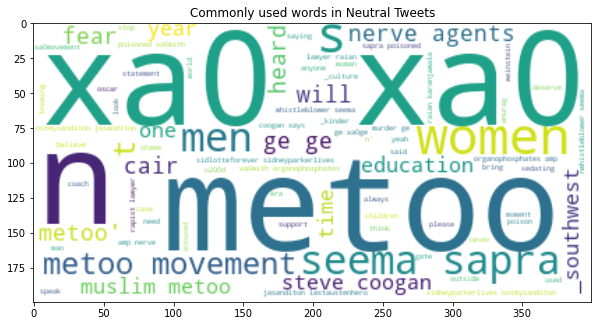

In [143]:
plt.figure(figsize=(10,8))
plt.title('Commonly used words in Neutral Tweets')
createWordCloud(tweets_list_neutral['Tweets'].values)